<a href="https://colab.research.google.com/github/sahithivy/data-analysis-on-chess-players/blob/main/Analysis_on_Top_Chess_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Ranking.csv")

In [ ]:
c=['profilelink','profileimage']
data=data.drop(columns=c)

In [ ]:
data.head()

,name,rank,country,title,classicalrating,rapidrating,blitzrating,lastupdated
0,Magnus Carlsen,1,Norway,GM,2830,2818,2887,05-12-2023
1,Fabiano Caruana,2,United States,GM,2804,2762,2815,05-12-2023
2,Hikaru Nakamura,3,United States,GM,2788,2731,2874,05-12-2023
3,Ding Liren,4,China,GM,2780,2830,2787,05-12-2023
4,Ian Nepomniachtchi,5,Russia,GM,2769,2778,2795,05-12-2023


In [ ]:
data.shape

(223713, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223713 entries, 0 to 223712
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   name             223713 non-null  object
 1   rank             223713 non-null  int64 
 2   country          223713 non-null  object
 3   title            114008 non-null  object
 4   classicalrating  223713 non-null  int64 
 5   rapidrating      223713 non-null  int64 
 6   blitzrating      223713 non-null  int64 
 7   lastupdated      223713 non-null  object
dtypes: int64(4), object(4)
memory usage: 13.7+ MB


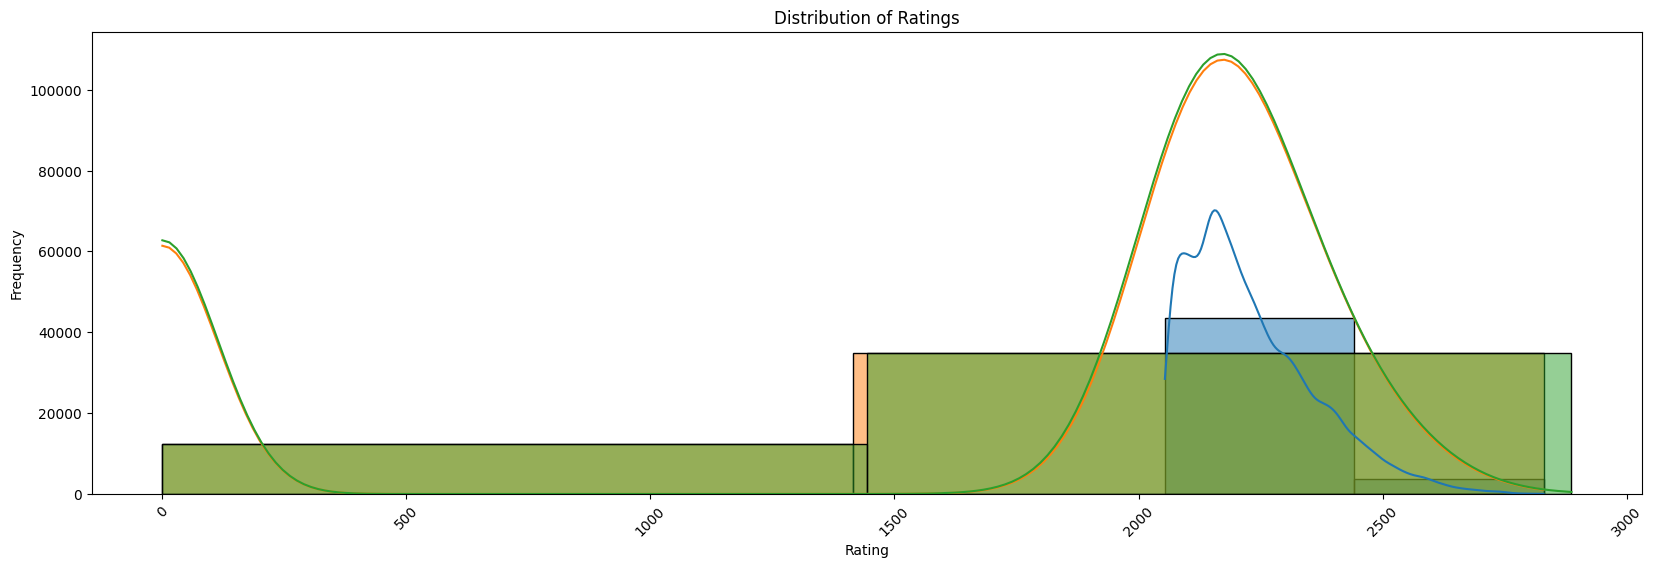

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(data['classicalrating'], bins=2, kde=True)
sns.histplot(data['rapidrating'], bins=2, kde=True)
sns.histplot(data['blitzrating'], bins=2, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

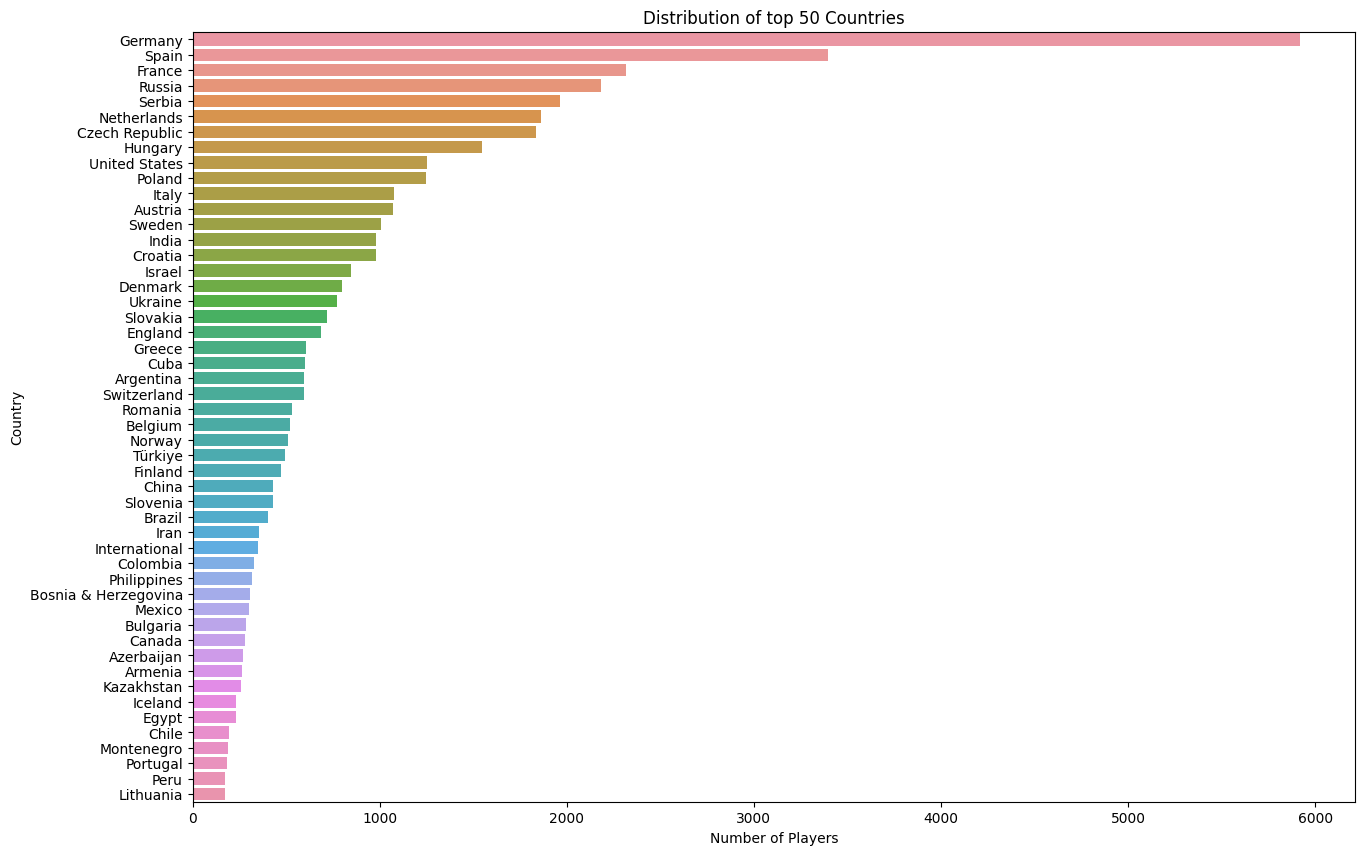

In [ ]:

plt.figure(figsize=(15, 10))
sns.countplot(y='country', data=data, order=data['country'].value_counts().head(50).index)
plt.title('Distribution of top 50 Countries')
plt.ylabel('Country')
plt.xlabel('Number of Players')
plt.show()

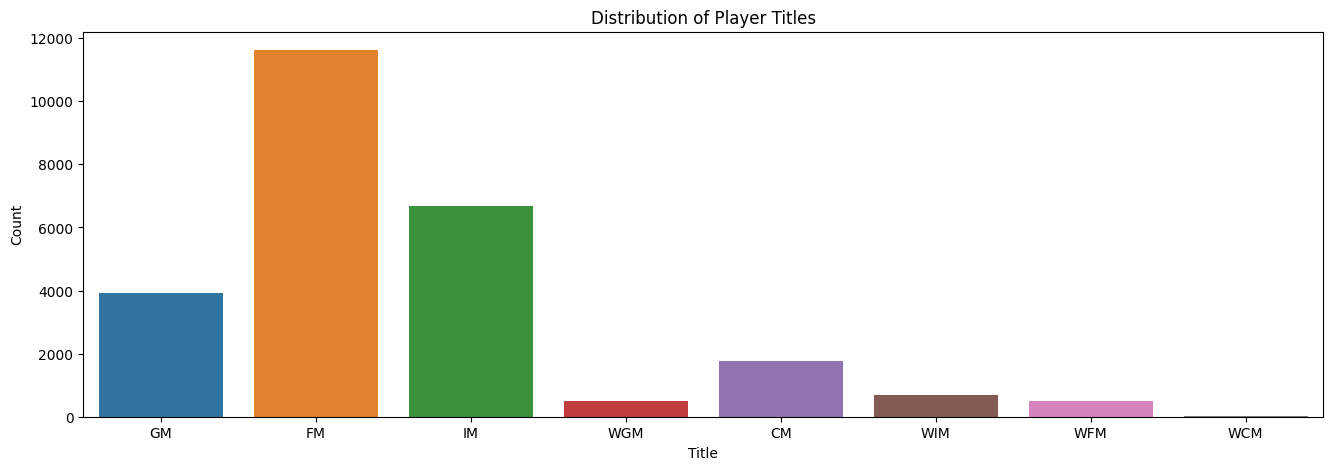

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(x='title', data=data)
plt.title('Distribution of Player Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

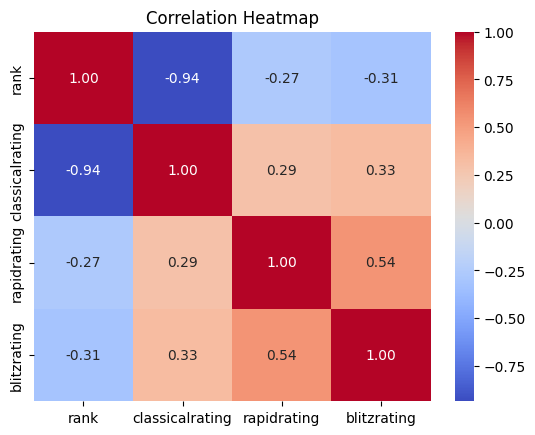

In [ ]:
correlation_matrix = data[['rank', 'classicalrating', 'rapidrating', 'blitzrating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
title_counts = data.groupby(['country', 'title']).size().reset_index(name='count')
top_countries = data['country'].value_counts().head(50).index
title_counts_top50 = title_counts[title_counts['country'].isin(top_countries)]
bar_fig = px.bar(title_counts_top50, x='country', y='count', color='title',
                 labels={'country': 'Country', 'count': 'Count', 'title': 'Title'},
                 title='Distribution of Player Titles in Top 50 Countries')
bar_fig.update_xaxes(tickangle=45)
bar_fig.show()


In [ ]:
import plotly.express as px

player_name = "Praggnanandhaa Rameshbabu"
data['lastupdated'] = pd.to_datetime(data['lastupdated'], format='%d-%m-%Y')
magnus_df = data[data['name'] == player_name]
rating_fig = px.line(magnus_df, x='lastupdated', y='classicalrating',
                     title='{} - Rating Over Time'.format(player_name),
                     labels={'lastupdated': 'Date', 'rating': 'Rating'})
rating_fig.show()
rank_fig = px.line(magnus_df, x='lastupdated', y='rank',
                   title='{} - Ranking Over Time'.format(player_name),
                   labels={'lastupdated': 'Date', 'rank': 'Ranking'})
rank_fig.show()